### Exercise 10.2: Time Series Analysis<br>Michael Hotaling<br>11/04/2020

## Exercise 12-1

The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from datetime import datetime
import thinkstats2
import scipy.stats as ss

C:\Users\MHotaling144186\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('mj-clean.csv', parse_dates=[5])
df.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [3]:
high = df[df['quality'] == "high"]

medium = df[df['quality'] == "medium"]

low = df[df['quality'] == "low"]

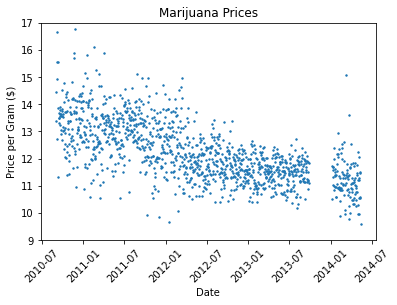

In [4]:
high_clean = high.groupby('date')
high_clean = pd.DataFrame(high_clean.mean(), columns=['ppg'])
high_clean["date"] = high_clean.index

plt.scatter(high_clean['date'] ,high_clean['ppg'], s = 2)
plt.xticks(rotation=45);
plt.ylim(9,17);
plt.xlabel("Date");
plt.ylabel("Price per Gram ($)");
plt.title("Marijuana Prices");

In [5]:
def RunQuadraticModel(df):
    df['years'] = pd.DatetimeIndex(df['date']).year
    df['years_2'] = df["years"]**2
    model = smf.ols('ppg ~ years + years_2', data=df)
    results = model.fit()
    return model, results

In [6]:
model, results = RunQuadraticModel(high_clean)
results.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     460.7
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          2.76e-150
Time:                        20:23:32   Log-Likelihood:                -1529.2
No. Observations:                1241   AIC:                             3064.
Df Residuals:                    1238   BIC:                             3080.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.175e+05    6.8e+04      4.670      0.000    1.84e+05    4.51e+05
years       -314.9478     67.578     -4.661      0.000    -447.528    -182.368
years_2        0.0781      0.017      4.651      0.000       0.045       0.111
==============================================================================
Omnibus:                       63.271   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.168
Skew:                           0.345   Prob(JB):                     6.61e-28
Kurtosis:                       4.395   Cond. No.                     1.17e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

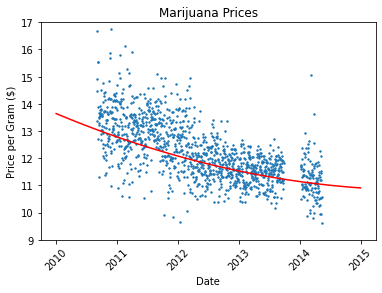

In [7]:
# The prediction calculation requires integer values to work correctly, or else it makes a staircase-like line.
years = np.linspace(2010, 2015, 101)
prediction = results.params[0] + results.params[1] * years + results.params[2] * (years ** 2)


# To plot the data on a time series, I need to convert those values to dates. 
# I wanted to convert the above dates, but there doesn't seem to be a good way to do that easily.
start = pd.Timestamp('2010-01-01')
end = pd.Timestamp('2015-01-01')
time = np.linspace(start.value, end.value, 101)

time = pd.to_datetime(time)

plt.plot(time, prediction, color = "red")
plt.scatter(high_clean['date'] ,high_clean['ppg'], s = 2)
plt.xticks(rotation=45);
plt.ylim(9,17);
plt.xlabel("Date");
plt.ylabel("Price per Gram ($)");
plt.title("Marijuana Prices");

I may have made a mistake here somewhere because the line looks a bit different from the solutions model. It's sitting a little bit low on the graph.  I'm sure it has to do with the dates not lining up right.

### Exercise 12-2

Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [8]:
# Full disclaimer, I am awful with object oriented programming. I can't figure it out and I've been trying hard
# to do so these past few weeks. I hope this is acceptable for now. I'll do my best to catch up with this. 

def corr(series, lag):
    import scipy.stats as ss
    cor, pval = ss.pearsonr(series[:-lag],series[lag:])
    return cor, pval

def corr2(series, lag):
    cor = series.autocorr(lag)
    return cor

## Price Data

In [9]:
series = high_clean['ppg']

cor = []
pval = []

cor2 = []

for i in np.arange(1,101):
    val, pvalue = corr(high_clean['ppg'], i )
    val2 = corr2(high_clean['ppg'], i)
    cor.append(val)
    pval.append(pvalue)
    cor2.append(val2)

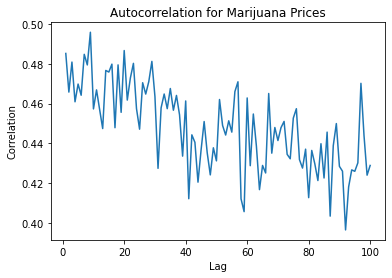

In [10]:
plt.plot(np.arange(1,101), cor);
plt.title("Autocorrelation for Marijuana Prices")
plt.ylabel("Correlation")
plt.xlabel("Lag");

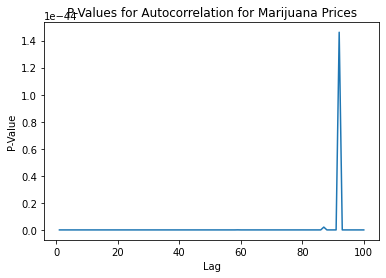

In [11]:
plt.plot(np.arange(1,101), pval);
plt.title("P-Values for Autocorrelation for Marijuana Prices")
plt.ylabel("P-Value")
plt.xlabel("Lag");
# plt.axhline(0.05, color = "red");

In [12]:
# Comparing my values against the solutions

def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [13]:
series = high_clean.ppg

sol_list = [] 
sol_pval = []

for i in range(1,101):
    test = SerialCorrelationTest((series, i))
    pvalue = test.PValue()
    sol_list.append(test.actual)
    sol_pval.append(pvalue)

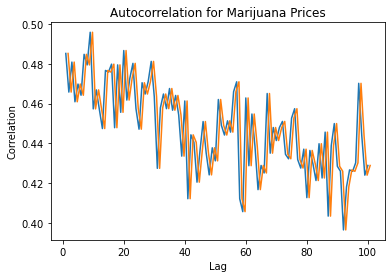

In [14]:
plt.plot(np.arange(1,101), cor);
plt.plot(np.arange(1.75,101.75), sol_list);
plt.title("Autocorrelation for Marijuana Prices")
plt.ylabel("Correlation")
plt.xlabel("Lag");

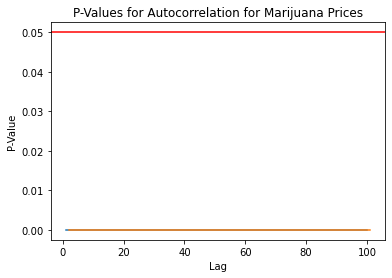

In [15]:
plt.plot(np.arange(1,101), pval);
plt.plot(np.arange(2,102), sol_pval);
plt.title("P-Values for Autocorrelation for Marijuana Prices")
plt.ylabel("P-Value")
plt.xlabel("Lag");
plt.axhline(0.05, color = "red");

## Linear Residuals

In [16]:
cor = []
pval = []

cor2 = []

# Stolen from the book
def RunLinearModel(series):
    model = smf.ols('ppg ~ years', data=series)
    results = model.fit()
    return model, results

model, results = RunLinearModel(high_clean)
series = results.resid

for i in np.arange(1,101):
    val, pvalue = corr(series, i )
    val2 = corr2(series, i)
    
    cor.append(val)
    pval.append(pvalue)
    cor2.append(val2)

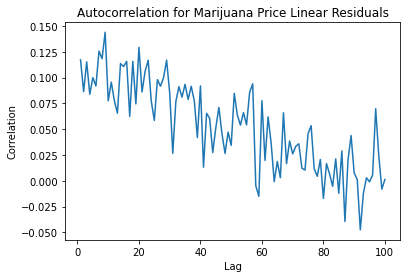

In [17]:
plt.plot(np.arange(1,101), cor);
# plt.plot(np.arange(2,102), cor2);
plt.title("Autocorrelation for Marijuana Price Linear Residuals")
plt.ylabel("Correlation")
plt.xlabel("Lag");

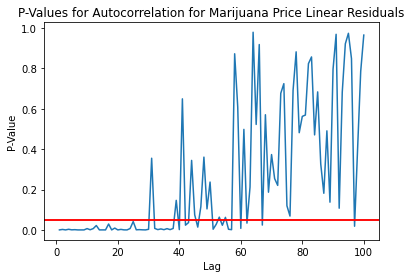

In [18]:
plt.plot(np.arange(1,101), pval)
plt.axhline(0.05, color = "red")
plt.title("P-Values for Autocorrelation for Marijuana Price Linear Residuals")
plt.ylabel("P-Value")
plt.xlabel("Lag");
plt.axhline(0.05, color = "red");

In [19]:
# Solution Comparison

_, results = RunLinearModel(high_clean)
series = results.resid

sol_list2 = [] 
sol_pval2 = []

for i in np.arange(1,101):
    test = SerialCorrelationTest((series, i))
    pvalue = test.PValue()
    sol_list2.append(test.actual)
    sol_pval2.append(pvalue)

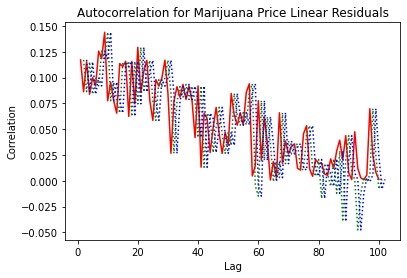

In [20]:
plt.plot(np.arange(1,101), sol_list2, c = "red");
plt.plot(np.arange(2,102), cor, c = "green", ls = "dotted");
plt.plot(np.arange(3,103), cor2, c = "blue", ls = "dotted");
plt.title("Autocorrelation for Marijuana Price Linear Residuals")
plt.ylabel("Correlation")
plt.xlabel("Lag");

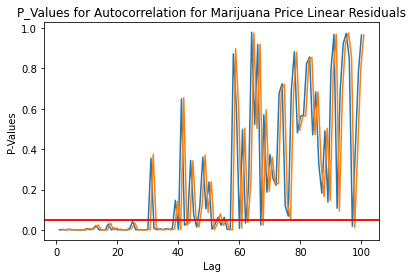

In [21]:
plt.plot(np.arange(1,101), pval);
plt.plot(np.arange(1.75,101.75), sol_pval2);
plt.axhline(0.05, color = "red");
plt.title("P_Values for Autocorrelation for Marijuana Price Linear Residuals")
plt.ylabel("P-Values")
plt.xlabel("Lag");
plt.axhline(0.05, color = "red");

## Quadratic Residuals

In [22]:
cor = []
pval = []

cor2 = []

model, results = RunQuadraticModel(high_clean)
series = results.resid
  
for i in np.arange(1,101):
    val, pvalue = corr(series, i )
    val2 = corr2(series, i)
    cor.append(val)
    pval.append(pvalue)
    cor2.append(val2)

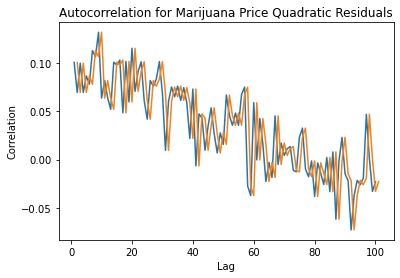

In [23]:
plt.plot(np.arange(1,101), cor);
plt.plot(np.arange(2,102), cor2);
plt.title("Autocorrelation for Marijuana Price Quadratic Residuals")
plt.ylabel("Correlation")
plt.xlabel("Lag");

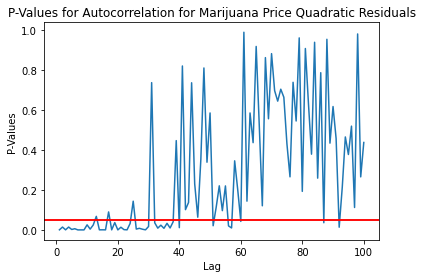

In [24]:
plt.plot(np.arange(1,101), pval)
plt.axhline(0.05, color = "red");
plt.title("P-Values for Autocorrelation for Marijuana Price Quadratic Residuals")
plt.ylabel("P-Values")
plt.xlabel("Lag");
plt.axhline(0.05, color = "red");

In [25]:
# Solution Comparison

_, results = RunQuadraticModel(high_clean)
series = results.resid

sol_list3 = [] 
sol_pval3 = []

for i in np.arange(1,101):
    test = SerialCorrelationTest((series, i))
    pvalue = test.PValue()
    sol_list3.append(test.actual)
    sol_pval3.append(pvalue)

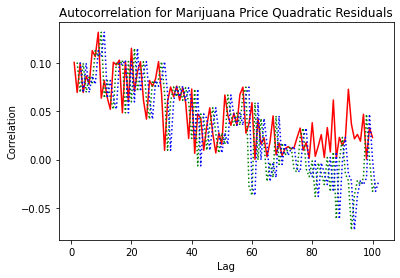

In [26]:
plt.plot(np.arange(1,101), sol_list3, c = "red");
plt.plot(np.arange(2,102), cor, c = "green", ls = "dotted");
plt.plot(np.arange(3,103), cor2, c = "blue", ls = "dotted");
plt.title("Autocorrelation for Marijuana Price Quadratic Residuals")
plt.ylabel("Correlation")
plt.xlabel("Lag");

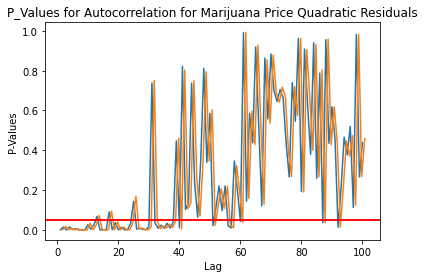

In [27]:
plt.plot(np.arange(1,101), pval);
plt.plot(np.arange(1.75,101.75), sol_pval3);
plt.axhline(0.05, color = "red");
plt.title("P_Values for Autocorrelation for Marijuana Price Quadratic Residuals")
plt.ylabel("P-Values")
plt.xlabel("Lag");
plt.axhline(0.05, color = "red");

Not sure why, but my version is losing accuracy as the lag time increases. The p-values are the same regardless so I think it might have to do with the way the author and I are calculating the correlation.